In [1]:
import glob
import os
import numpy as np
import pandas as pd
import seaborn as sns
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2
import pickle

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [3]:
folder_path = "D:/Projects/News Article classifier/01 Dataset Creation/Pickles//"

filename = "features_test.pickle"
with open(folder_path + filename, "rb") as file:
    features_test = pickle.load(file)
    
filename = "features_train.pickle"
with open(folder_path + filename, "rb") as file:
    features_train = pickle.load(file)
    
filename = "labels_test.pickle"
with open(folder_path + filename, "rb") as file:
    labels_test = pickle.load(file)

filename = "labels_train.pickle"
with open(folder_path + filename, "rb") as file:
    labels_train = pickle.load(file)
    
filename = "data.pickle"
with open(folder_path + filename, "rb") as file:
    data = pickle.load(file)
    


In [4]:
features = np.concatenate((features_train.toarray(), features_test.toarray()), axis = 0)

In [5]:
labels = np.concatenate((labels_train, labels_test), axis = 0)

In [6]:
features.shape

(2226, 300)

In [7]:
labels.shape

(2226,)

In [8]:
def visualize(mod , features, labels, n_components = 2):
    if mod == "PCA":
        model = PCA(n_components=n_components)
    elif mod == "t-SNE":
        model = TSNE(n_components=n_components)
    else:
        print("Model name invalid")
    
    principal_components = model.fit_transform(features)
    
    df_features = pd.DataFrame(data = principal_components, columns = ["PC1", "PC2"])
    df_labels = pd.DataFrame(data = labels, columns=["label"])
    
    df_full = pd.concat([df_features, df_labels], axis = 1)
    df_full["label"] = df_full["label"].astype("str")

    category_names = {"0" : "Business",
                     "1" : "Entertainment",
                     "2" : "Politics",
                     "3" : "Sport",
                     "4" : "Tech"}

    df_full["label_name"] = df_full["label"]
    df_full = df_full.replace({"label_name" : category_names})
    
    #Finally Plotting
    plt.figure(figsize=(12, 12))
    sns.scatterplot(x = "PC1", y = "PC2", hue = "label_name" ,data = df_full,
                   palette = ["red", "pink", "royalblue", "lightseagreen", "greenyellow"])

## Principal Component Analysis plot

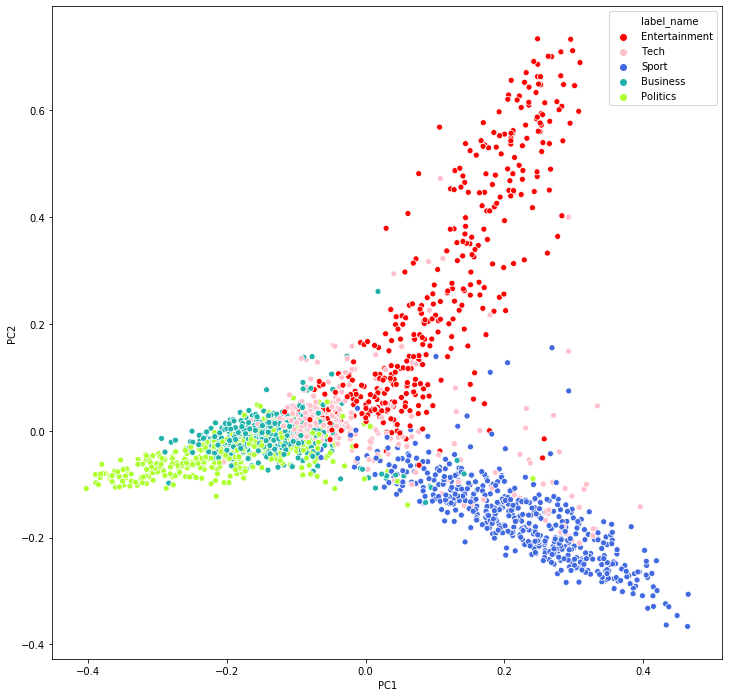

In [9]:
visualize("PCA", features, labels)

## t-SNE plot

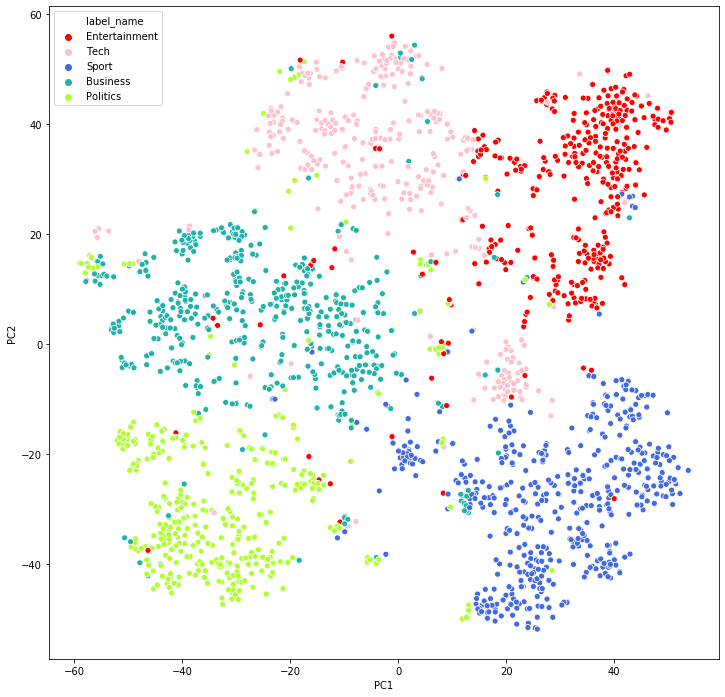

In [10]:
visualize("t-SNE", features, labels)

As we can see t-SNE visualizes the data much better.

We could have used t-SNE technique for feature extraction but here we are only using it for visualization of our data.